## <font color=purple>MARKET BASKET ANALYSIS USING APRIORI ALGORITHM

 ## Data Preparation

In [120]:
import pandas as pd
import numpy as np
from apyori import apriori
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [121]:
df = pd.read_csv('Groceries.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## Data Preprocessing

In [122]:
df.shape

(38765, 3)

In [123]:
df.Member_number.nunique()

3898

In [124]:
df.itemDescription.nunique()

167

In [125]:
df.Date.nunique()

728

In [126]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [127]:
df["itemDescription"].value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

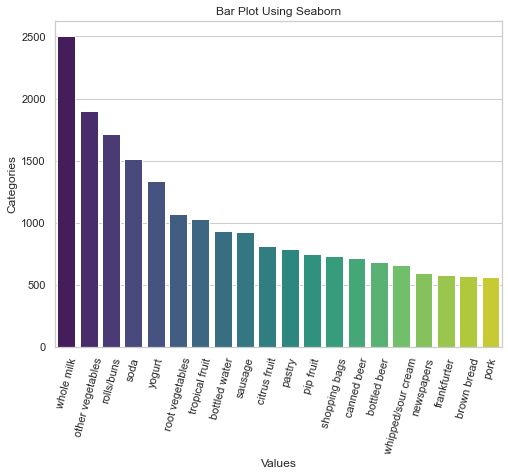

In [128]:
#20 most frequently occurring grocery items in the dataset:

sns.set(style="whitegrid")  # Set the plot style (optional)

# Create the bar plot
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.barplot(x=df.itemDescription.value_counts().head(20).index,
            y=df.itemDescription.value_counts().head(20), palette="viridis")

# Set labels and title
plt.xlabel("Values")
plt.ylabel("Categories")
plt.title("Bar Plot Using Seaborn")
plt.xticks(rotation=75)

# Show the plot
plt.show()

## Implementation  using apyori

<i> <b>Association Rule Mining :</b>
<i> Association rule mining is a process that deploys pattern recognition to identify and quantify relationship between different, yet related items.

<i> A simple association rules use case -

<i> milk and bread are frequently purchased together. With this finding, you can increase sales by:

<i> -Placing milk and bread next to each other so that when a customer buys one of the products, they don't have to walk to buy the other product <br>
-Advertising to buyer of either eggs or bread in order to increase that person's propensity to purchase the (paired) other product.<br>
-Offer discounts on both eggs and bread if the customer buys both of them in one purchase.<br>
<b>Association Rule:</b> "if item eggs are purchased,then the possibility of buying bread is __"

<i> Can also be represented as:

<i> {milk} -> {bread}

<i> Advantages of Association Rule Mining :
Relatively fast method
Works well on small quantities of data
Few(if any) feature engineering requirement

<i> Three Ways to Measure Association :
Support, 
Confidence, 
Lift

<i><b> Support </b> :
Support is a relative frequency of an item wthin a dataset.It basically expresses how popular the item is as represented by its proportion to the total items sold.
Support for an item can be calculated as support(A->C) = Support (A ∪ C)

<i> <b> Confidence </b> :
Confidence is the probability of seeing the consequent item (a "then" term) within data, given that the data also contains the antecendent (the "if" term) item
In other words, confidence tells you (THEN) How likely it is for 1 item to be purchased given that, (IF) another item is purchased.
Confidence determines how many if-then statements are found to be true within a dataset
Confidence(A -> C) = (Support(A -> C)) / (Support(A))

<i> Where 
A - antecedent 
C - consequent

<i> <b>Lift </b>:
Lift is a metric that measures how much more often the antecedent and consequent occur together rather than them occuring independently.

<i> Lift(A -> C) = (Confidence(A -> C)) / (Support(C))

<i> Lift score >1: A is hightly associated with C. If A purchased, then it is highly likely that C will also be purchased.<br> Lift score <1: If A purchased, then it is unlikely that C will be purchased. <br>
Lift score =1: Indicates that there is no association between items A and C.


In [129]:
transactions = df.groupby(['Member_number', 'Date'])
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transactions)]
list_transactions[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [130]:
rules = apriori(list_transactions, min_support = 0.001, min_confidence = 0.05, min_lift = 1.2, max_length = 2)
result = list(rules)

In [131]:
#Converting the results to a dataframe format
df1 = pd.DataFrame(columns = ['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'])
for items in result:
    if len(items[0])>1:
        for j in range(0, len(items[2])):
            antecedents = list(items[2][j][0])[0]
            consequents = list(items[2][j][1])[0]  
            support = items[1]*100
            confidence = items[2][j][2]*100
            lift = items[2][j][3]
            df1 = df1.append({'Antecedents': antecedents , 'Consequents':consequents ,
                      'Support': support, 
                      'Confidence': confidence, 'Lift': lift}, ignore_index=True)
    
df1['Rules'] = df1['Antecedents'] + ' -> ' + df1['Consequents']
print("No of Rules: ", df1['Rules'].count())


No of Rules:  30


In [132]:
df1

,Antecedents,Consequents,Support,Confidence,Lift,Rules
0,beverages,sausage,0.153712,9.274194,1.536764,beverages -> sausage
1,bottled beer,sausage,0.334158,7.374631,1.222,bottled beer -> sausage
2,sausage,bottled beer,0.334158,5.537099,1.222,sausage -> bottled beer
3,sugar,bottled water,0.147029,8.301887,1.368074,sugar -> bottled water
4,brown bread,canned beer,0.240593,6.394316,1.362937,brown bread -> canned beer
5,canned beer,brown bread,0.240593,5.128205,1.362937,canned beer -> brown bread
6,candy,citrus fruit,0.100247,6.976744,1.31312,candy -> citrus fruit
7,white bread,canned beer,0.153712,6.406685,1.365573,white bread -> canned beer
8,cat food,tropical fruit,0.100247,8.474576,1.250543,cat food -> tropical fruit
9,chewing gum,yogurt,0.140346,11.666667,1.358508,chewing gum -> yogurt


##  Visualization

### <font color=orange> Scatter Plot using matplotlib </font>

<i>A scatter plot, created using the Matplotlib library in Python, is a fundamental data visualization that displays individual data points as dots on a two-dimensional plane. Each dot on the scatter plot represents a single data point, with its position determined by the values of two variables. Scatter plots are particularly useful for exploring and visualizing the relationships and patterns between two continuous variables

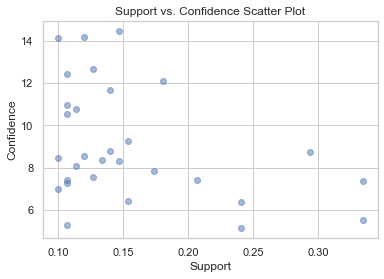

In [133]:
import matplotlib.pyplot as plt

# Scatter plot (unlabeled)
plt.scatter(df1['Support'], df1['Confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence Scatter Plot')

plt.show()

### <font color=orange> Scatterplot using seaborn

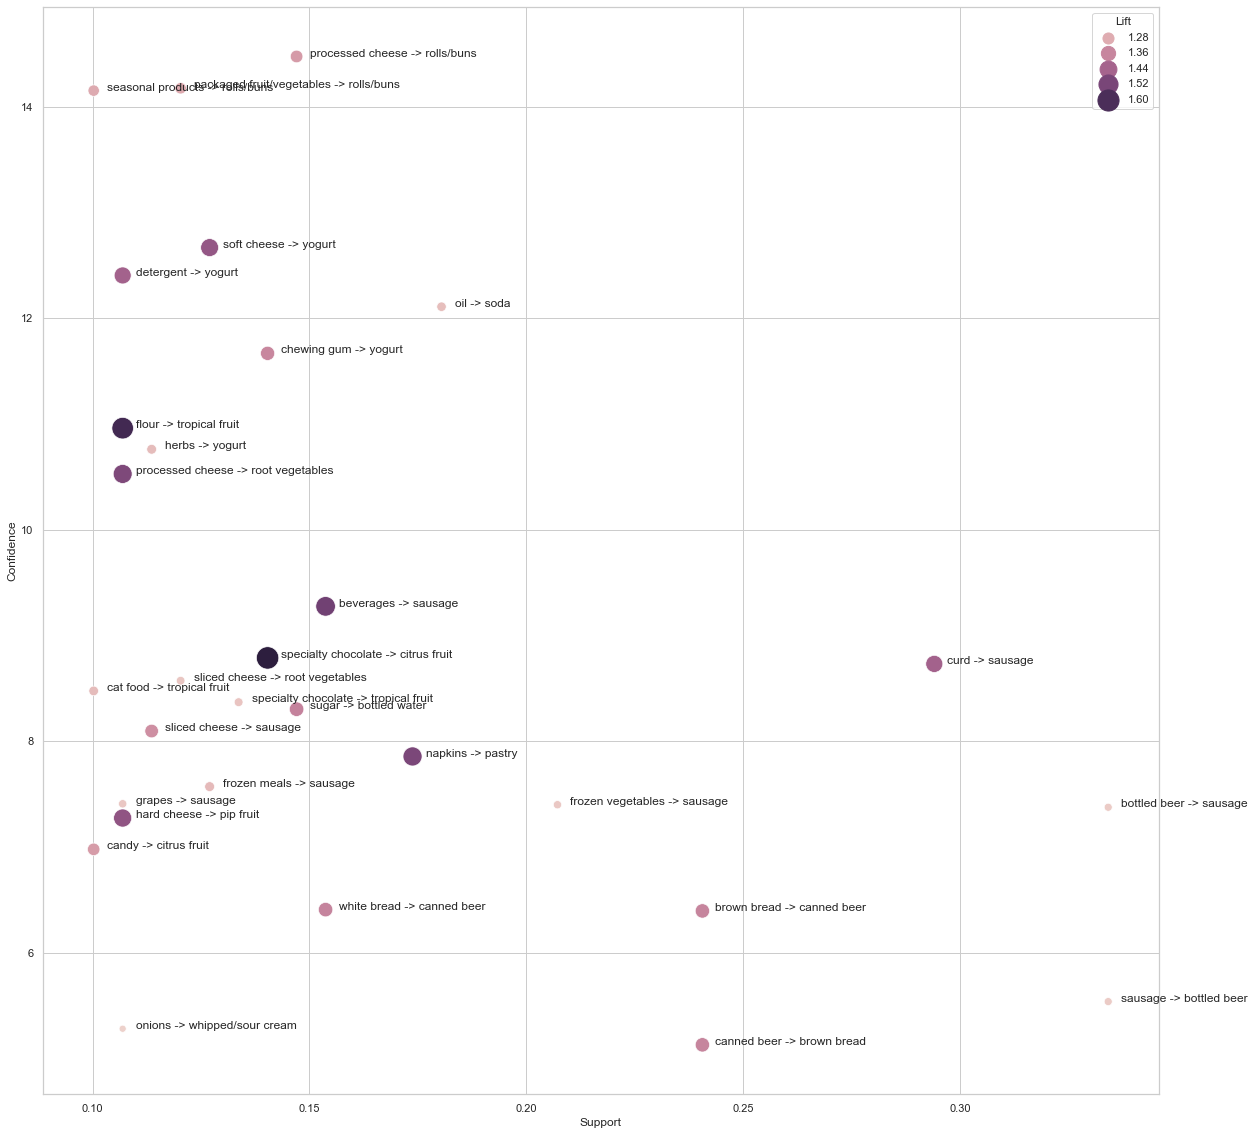

In [134]:
plt.figure(figsize = (20,20))
ssupport = df1['Support']
cconfidence = df1['Confidence']
rule = df1['Rules']
ax = sns.scatterplot(data = df1, x = 'Support', y = 'Confidence', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (ssupport[i] + 0.003, cconfidence[i] ))

### <font color=orange> Heatmap


<i>A heatmap is a graphical representation that uses colors to visualize the values of a matrix or a 2D dataset. It is a powerful data visualization tool that helps to quickly identify patterns, trends, and variations in data by assigning colors to different data points. Heatmaps are particularly useful for highlighting the relationships and variations in large datasets, making them an essential tool in fields such as data analysis, data science, and biology.

<i> In a heatmap:

<i>Rows and columns represent data points, categories, or items.
Colors are used to represent the magnitude or intensity of values, typically ranging from low (e.g., cool colors like blue or green) to high (e.g., warm colors like red or yellow).
Each cell in the matrix is filled with a color that corresponds to the value it represents. 

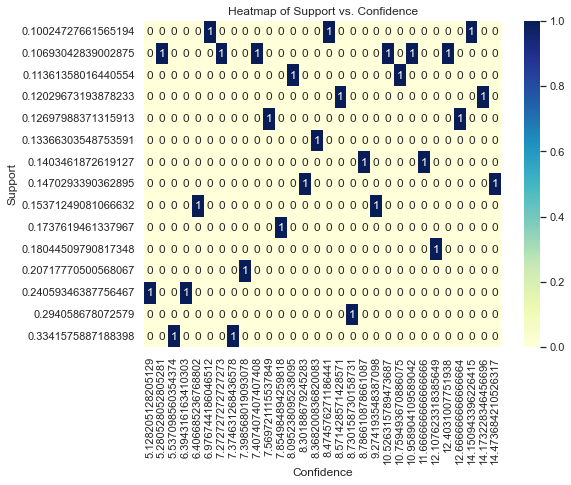

In [135]:
# Creating a pivot table for the heatmap
heatmap_data = df1.pivot_table(index='Support', columns='Confidence', aggfunc='size', fill_value=0)

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Confidence')
plt.ylabel('Support')
plt.title('Heatmap of Support vs. Confidence')
plt.show()

### <font color=orange> Bar Diagram

<i>A bar diagram, also known as a bar chart or bar graph, is a common and straightforward data visualization that uses rectangular bars to represent and compare the values of different categories or data points. Each bar's length or height is proportional to the value it represents, making it easy to visualize and compare data at a glance.



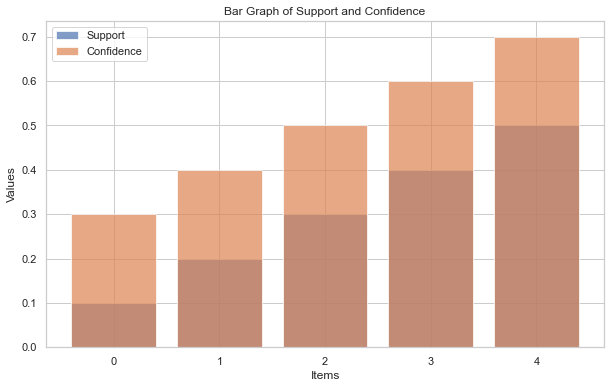

In [140]:
# Extract item names
items = df1.index

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(items, df1['Support'], label='Support', alpha=0.7)
plt.bar(items, df1['Confidence'], label='Confidence', alpha=0.7)
plt.xlabel('Items')
plt.ylabel('Values')
plt.title('Bar Graph of Support and Confidence')
plt.legend()
plt.show()
